In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from esis.data import level_3
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
# lev3 = level_3.Level3.from_aia_level1(heI = True)
# lev3.to_pickle('heI.pickle')
lev3 = level_3.Level3.from_pickle('heI.pickle')



In [3]:
normalized_imgs = lev3.observation.data
normalized_imgs = (normalized_imgs - normalized_imgs.mean(axis = (-2,-1),keepdims=True))/normalized_imgs.std(
    axis=(-2,-1),keepdims=True)

camera_combos = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
list_cc = []
for lev3_seq,lev1_seq in enumerate(lev3.lev1_sequences):
    for i,j in camera_combos:
        cc = np.sum(normalized_imgs[lev3_seq,i]*normalized_imgs[lev3_seq,j])/normalized_imgs[lev3_seq,i].size
        list_cc.append(cc)

list_cc = np.array(list_cc)
print(list_cc.mean())

0.6619007701302607


In [4]:
# updated_lev_3 = lev3.update_internal_alignment(heI = True)
# updated_lev_3.to_pickle('heI_updated.pickle')
updated_lev_3 = level_3.Level3.from_pickle('heI_updated.pickle')

In [5]:
normalized_imgs = updated_lev_3.observation.data
normalized_imgs = (normalized_imgs - normalized_imgs.mean(axis = (-2,-1),keepdims=True))/normalized_imgs.std(
    axis=(-2,-1),keepdims=True)

camera_combos = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
updated_list_cc = []
for lev3_seq,lev1_seq in enumerate(updated_lev_3.lev1_sequences):
    for i,j in camera_combos:
        cc = np.sum(normalized_imgs[lev3_seq,i]*normalized_imgs[lev3_seq,j])/normalized_imgs[lev3_seq,i].size
        updated_list_cc.append(cc)

updated_list_cc = np.array(updated_list_cc)
print(updated_list_cc.mean())


0.6662928343154478


In [6]:
updated_lev_3.add_mask(line = 'hei')



/media/jake/Media/Documents/Research/Kankelborg Group/kgpy/kgpy/img/coalignment/image_coalignment.py:172: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  transform = np.linalg.lstsq(prime_coord_power.T,coords.T)


In [7]:
scale = [.4,.4,.4,.4]
vignetting = updated_lev_3.correct_vignetting(scale)
updated_lev_3.observation.data[...] /= vignetting
normalization = updated_lev_3.masked_mean_normalization()
normalized_imgs = updated_lev_3.observation.data/normalization


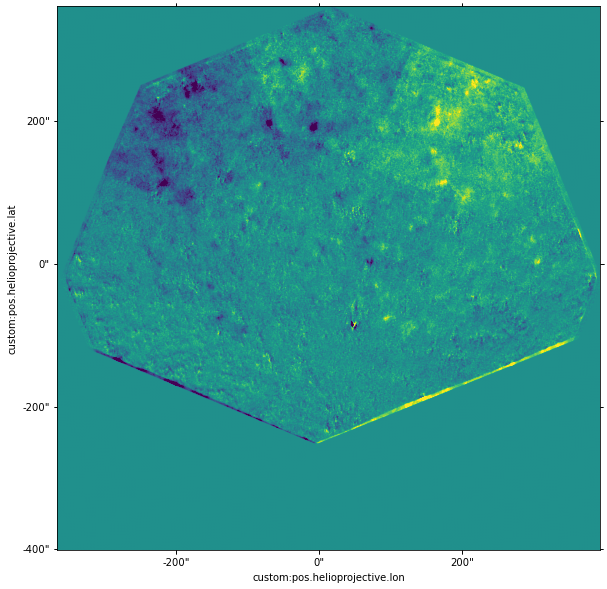

In [8]:
sequence = 15
cameras = [1,2]
wcs_copy = updated_lev_3.observation.wcs.copy()
fig,ax = plt.subplots(subplot_kw={'projection':wcs_copy[sequence,0]})
ax.imshow((normalized_imgs[sequence,cameras[0]]-normalized_imgs[sequence,cameras[1]])
          *updated_lev_3.observation.mask[sequence,cameras[0]]
          *updated_lev_3.observation.mask[sequence,cameras[1]],
          vmin = -1, vmax = 1,origin = 'lower')

In [9]:
updated_lev_3.observation.data[...] /= normalization
updated_lev_3.to_pickle(level_3.hei_final_path)



